In [1]:
%matplotlib inline

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

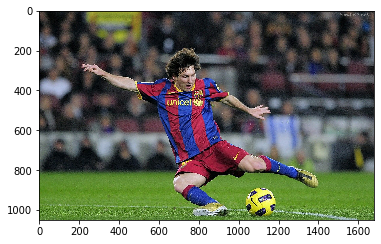

In [2]:
img = np.array(Image.open('./assets/roi.jpg'))
plt.imshow(img)

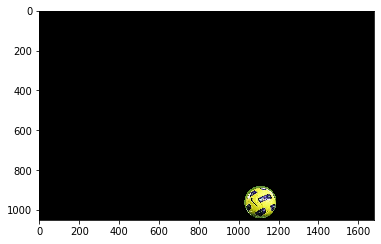

In [3]:
#get the dimensions of the image
n,m,d = img.shape

#create an open grid for our image
x,y = np.ogrid[0:n, 0:m]

#operate on a copy of the image
copyImg = img.copy()

#get the x and y center points of our image
center_x = 960
center_y = 1110

#create a circle mask which is centered in the middle of the image
circle_mask = (x-center_x)**2 + (y-center_y)**2 <= 81**2

#black out anywhere within the circle mask
copyImg[~circle_mask] = [0,0,0]

#show the image
plt.imshow(copyImg)

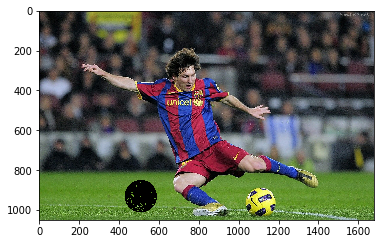

In [4]:
for h in range(copyImg.shape[0]):
    for w in range(copyImg.shape[1]):
        if  copyImg[h,w,0] != 0 and copyImg[h,w,1] != 0 and copyImg[h,w,2] != 0 :
            copyImg[h - 30,w - 600,:]=copyImg[h,w,:]
            copyImg[h,w,:]=0
            img[h- 30,w - 600,:]=0

            
# img = np.bitwise_or(img,copyImg)
plt.imshow(img)

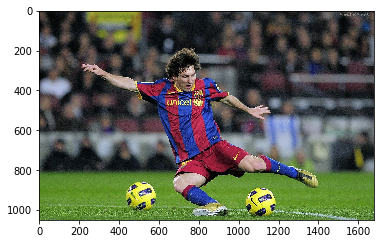

In [6]:
img = np.bitwise_or(img,copyImg)
plt.imshow(img)
img = Image.fromarray(img.astype("uint8"))
img.save('./outputs/roi_out.jpg')